In [1]:
!pip install pyspark


An ETL (Extract,Transform,Load) pipeline extracts data from sources, transforms it, and loads it into a storage system. this process helps create clean, usable data formats for further data analysis.


PySpark is used for building ETL pipelines for large scale data processing.
It offers distributed computing, high performance, and handles structured and as well as unstructured data efficiently.

This project will take you through building an ETL pipeline using PySpark.




In [1]:
from pyspark.sql import SparkSession

# creating Spark session
spark = SparkSession.builder.appName('ETL_1').getOrCreate()

PySpark is the Python API for Apache Spark. It enables you to perform real-time, large-scale data processing in a distributed environment using Python. It also provides a PySpark shell for interactively analyzing your data.

In PySpark, we are loading a CSV file into a distributed DataFrame, which is similar to using pandas.read_csv() to load data into a Pandas DataFrame

Pandas uses memory and runs on a single machine, but PySpark handles large datasets distributed across a cluster.

Spark's df.printSchema() and df.show(5) are used to understand the data's structure (schema) and preview a few rows, which is similar to Pandas'
df.info() and df.head(), but tailored for handling big data workloads in Big Data Analytics.

In [2]:
# loading the CSV file into a Spark DataFrame
file_path = '/content/temperature.csv'
df = spark.read.csv(file_path, header=True, inferSchema=True)

# display the schema and preview the data
df.printSchema()

root
 |-- ObjectId: integer (nullable = true)
 |-- Country: string (nullable = true)
 |-- ISO2: string (nullable = true)
 |-- ISO3: string (nullable = true)
 |-- F1961: double (nullable = true)
 |-- F1962: double (nullable = true)
 |-- F1963: double (nullable = true)
 |-- F1964: double (nullable = true)
 |-- F1965: double (nullable = true)
 |-- F1966: double (nullable = true)
 |-- F1967: double (nullable = true)
 |-- F1968: double (nullable = true)
 |-- F1969: double (nullable = true)
 |-- F1970: double (nullable = true)
 |-- F1971: double (nullable = true)
 |-- F1972: double (nullable = true)
 |-- F1973: double (nullable = true)
 |-- F1974: double (nullable = true)
 |-- F1975: double (nullable = true)
 |-- F1976: double (nullable = true)
 |-- F1977: double (nullable = true)
 |-- F1978: double (nullable = true)
 |-- F1979: double (nullable = true)
 |-- F1980: double (nullable = true)
 |-- F1981: double (nullable = true)
 |-- F1982: double (nullable = true)
 |-- F1983: double (nullable 

In [3]:
df.show(10)

+--------+--------------------+----+----+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+-----+------+------+------+------+------+------+------+------+------+------+-----+------+------+------+-----+------+------+-----+-----+-----+------+-----+-----+-----+-----+-----+-----+------+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+
|ObjectId|             Country|ISO2|ISO3| F1961| F1962| F1963| F1964| F1965| F1966| F1967| F1968| F1969| F1970| F1971| F1972| F1973| F1974| F1975| F1976| F1977| F1978|F1979| F1980| F1981| F1982| F1983| F1984| F1985| F1986| F1987| F1988| F1989|F1990| F1991| F1992| F1993|F1994| F1995| F1996|F1997|F1998|F1999| F2000|F2001|F2002|F2003|F2004|F2005|F2006| F2007|F2008|F2009|F2010|F2011|F2012|F2013|F2014|F2015|F2016|F2017|F2018|F2019|F2020|F2021|F2022|
+--------+--------------------+----+----+------+------+------+------+------+------+------+------+-----

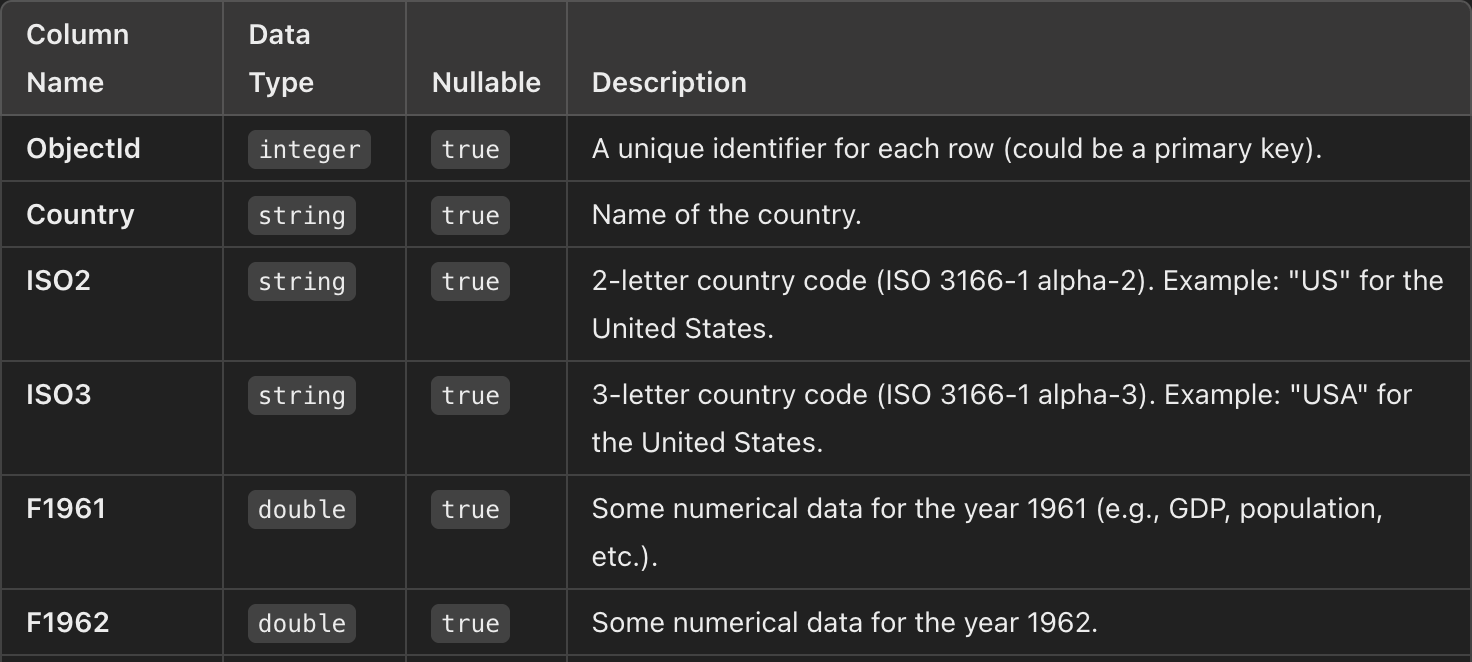

In [4]:
## mssing values in respective columns in datadrame

from pyspark.sql.functions import col, when, count

missing_values = df.select([count(when(col(c).isNull(), c)).alias(c) for c in df.columns])
missing_values.show()

+--------+-------+----+----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+
|ObjectId|Country|ISO2|ISO3|F1961|F1962|F1963|F1964|F1965|F1966|F1967|F1968|F1969|F1970|F1971|F1972|F1973|F1974|F1975|F1976|F1977|F1978|F1979|F1980|F1981|F1982|F1983|F1984|F1985|F1986|F1987|F1988|F1989|F1990|F1991|F1992|F1993|F1994|F1995|F1996|F1997|F1998|F1999|F2000|F2001|F2002|F2003|F2004|F2005|F2006|F2007|F2008|F2009|F2010|F2011|F2012|F2013|F2014|F2015|F2016|F2017|F2018|F2019|F2020|F2021|F2022|
+--------+-------+----+----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+--

In [5]:
# fill missing values for country codes
df = df.fillna({'ISO2': 'Unknown'})

# drop rows where all temperature values are null
temperature_columns = [col for col in df.columns if col.startswith('F')]
df = df.dropna(subset = temperature_columns, how = 'all')

In [6]:
missing_values = df.select([count(when(col(c).isNull(), c)).alias(c) for c in df.columns])
missing_values.show()

+--------+-------+----+----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+
|ObjectId|Country|ISO2|ISO3|F1961|F1962|F1963|F1964|F1965|F1966|F1967|F1968|F1969|F1970|F1971|F1972|F1973|F1974|F1975|F1976|F1977|F1978|F1979|F1980|F1981|F1982|F1983|F1984|F1985|F1986|F1987|F1988|F1989|F1990|F1991|F1992|F1993|F1994|F1995|F1996|F1997|F1998|F1999|F2000|F2001|F2002|F2003|F2004|F2005|F2006|F2007|F2008|F2009|F2010|F2011|F2012|F2013|F2014|F2015|F2016|F2017|F2018|F2019|F2020|F2021|F2022|
+--------+-------+----+----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+--

In [7]:
from pyspark.sql.functions import expr

# reshape temperature data to have 'Year' and 'Temperature' columns
df_pivot = df.selectExpr(
    "ObjectId", "Country", "ISO3",
    "stack(62, " +
    ",".join([f"'F{1961 + i}', F{1961 + i}" for i in range(62)]) +
    ") as (Year, Temperature)"
)

In [8]:
# Convert year columns (F1961, F1962, ...) to numeric

from pyspark.sql.functions import col

for year in range(1961, 2022):
    df = df.withColumn (f'f{year}',  col(f'f{year}').cast('double'))

In [9]:
df.show(10)

+--------+--------------------+----+----+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+-----+------+------+------+------+------+------+------+------+------+------+-----+------+------+------+-----+------+------+-----+-----+-----+------+-----+-----+-----+-----+-----+-----+------+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+
|ObjectId|             Country|ISO2|ISO3| f1961| f1962| f1963| f1964| f1965| f1966| f1967| f1968| f1969| f1970| f1971| f1972| f1973| f1974| f1975| f1976| f1977| f1978|f1979| f1980| f1981| f1982| f1983| f1984| f1985| f1986| f1987| f1988| f1989|f1990| f1991| f1992| f1993|f1994| f1995| f1996|f1997|f1998|f1999| f2000|f2001|f2002|f2003|f2004|f2005|f2006| f2007|f2008|f2009|f2010|f2011|f2012|f2013|f2014|f2015|f2016|f2017|f2018|f2019|f2020|f2021|F2022|
+--------+--------------------+----+----+------+------+------+------+------+------+------+------+-----

# **EDA - Exploratory Data Analysis**

In [10]:
df.describe().show()

+-------+-----------------+--------------------+----+----+------------------+--------------------+--------------------+--------------------+--------------------+-------------------+--------------------+--------------------+-------------------+-------------------+-------------------+--------------------+-------------------+--------------------+--------------------+--------------------+-------------------+-------------------+-------------------+------------------+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+------------------+-------------------+-------------------+-------------------+------------------+-------------------+------------------+------------------+------------------+-------------------+------------------+------------------+-------------------+------------------+------------------+-------------------+------------------+------------------+-----

.

checking the Top 15 Countries with the highest emissions in the latest Year,


and kuwait, Iraq, Tunisia and more are the major contributors in global emissions.

In [11]:
df.select('Country', 'ISO3', 'F2021') \
  .orderBy(col('F2021').desc()) \
  .show(15)


+--------------------+----+-----+
|             Country|ISO3|F2021|
+--------------------+----+-----+
|              Kuwait| KWT|2.676|
|                Iraq| IRQ|2.644|
|             Tunisia| TUN|2.555|
|              Canada| CAN|2.515|
|           Greenland| GRL|2.482|
| Bahrain, Kingdom of| BHR|2.464|
|             Algeria| DZA| 2.33|
|Saint Pierre and ...| SPM| 2.32|
|    Syrian Arab Rep.| SYR|2.238|
|        Saudi Arabia| SAU|2.203|
|Iran, Islamic Rep...| IRN|2.176|
|    Estonia, Rep. of| EST|2.167|
|               Qatar| QAT|2.165|
|               Malta| MLT|2.123|
|    Armenia, Rep. of| ARM|2.087|
+--------------------+----+-----+
only showing top 15 rows



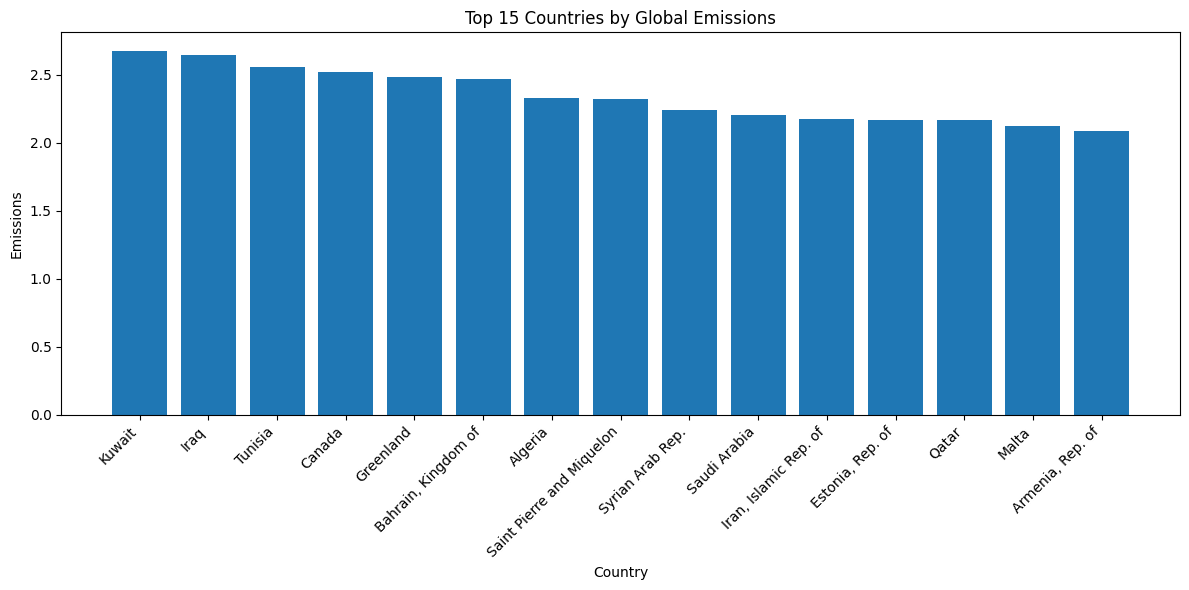

In [12]:
import matplotlib.pyplot as plt

# 'df' is your Spark DataFrame and the code to generate the top 15 emissions data is already executed.
# Replace 'F2021' with the appropriate column name if needed.

top_15_emissions = df.select('Country', 'F2021').orderBy(col('F2021').desc()).limit(15).toPandas()

plt.figure(figsize=(12, 6))
plt.bar(top_15_emissions['Country'], top_15_emissions['F2021'])
plt.xlabel('Country')
plt.ylabel('Emissions')
plt.title('Top 15 Countries by Global Emissions')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.tight_layout()
plt.show()



---



---



This analysis helps us understand which countries have the highest growth in carbon emissions over time.


these countries are major contributors to climate change. and are having  rapid industrialization and economic growth.

-> such that these countries must need need stronger environmental rules and policies.

In [13]:
from pyspark.sql.functions import lit

# creating new column to see the difference between 2021 and 1961 emissions
df = df.withColumn('Emission_Increase', col('F2021') - col('F1961'))

# top 15 countries with the highest increase in global emissions
df.select('Country', 'ISO3', 'Emission_Increase').orderBy(col('Emission_Increase').desc()).show(15)


+--------------------+----+------------------+
|             Country|ISO3| Emission_Increase|
+--------------------+----+------------------+
| Bahrain, Kingdom of| BHR|             2.935|
|              Kuwait| KWT|2.9010000000000002|
|                Iraq| IRQ|             2.833|
|           Greenland| GRL|             2.777|
|               Qatar| QAT|             2.707|
|              Canada| CAN|             2.458|
|               Libya| LBY|             2.397|
|Saint Pierre and ...| SPM|              2.36|
|        Saudi Arabia| SAU|              2.36|
|             Tunisia| TUN|             2.281|
|    Syrian Arab Rep.| SYR|             2.263|
|Iran, Islamic Rep...| IRN|             2.244|
|             Algeria| DZA|             2.166|
|               Niger| NER|2.1189999999999998|
|              Jordan| JOR|             2.112|
+--------------------+----+------------------+
only showing top 15 rows



It subtracts F1961 (carbon emissions in 1961) from F2021 (carbon emissions in 2021) to create a new column 'Emission_Increase' then data is sorted in descending order so that countries with the highest increase in emissions appear first and it shows 15 countries with the largest growth in emissions over the 60 years of time period

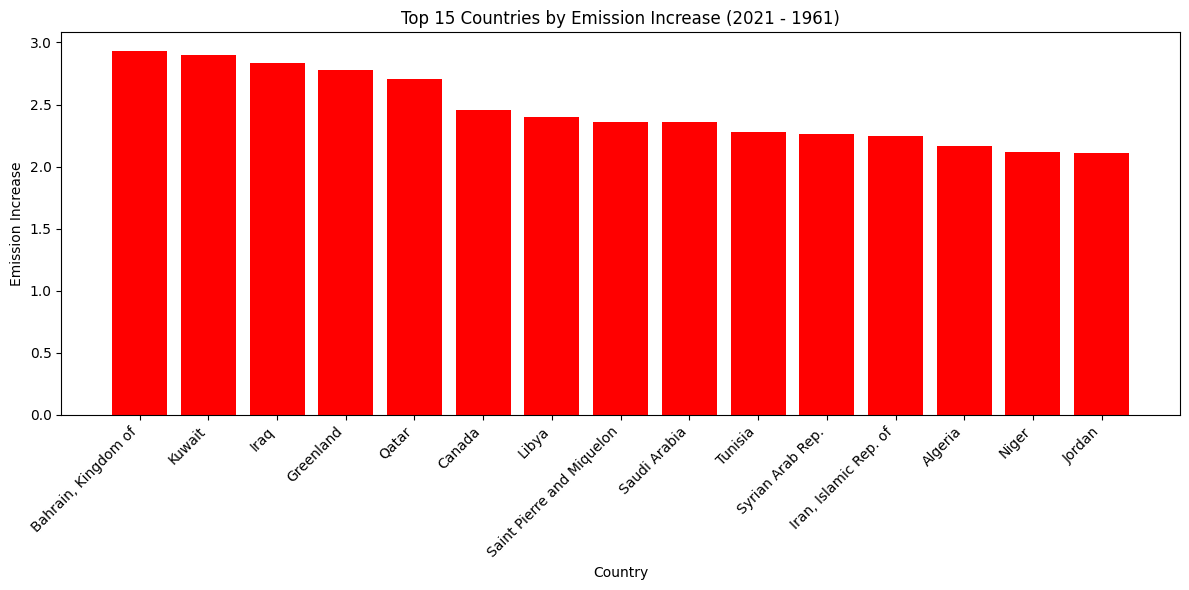

In [14]:
import matplotlib.pyplot as plt


top_15_emission_increase = df.select('Country', 'Emission_Increase').orderBy(col('Emission_Increase').desc()).limit(15).toPandas()

plt.figure(figsize=(12, 6))
plt.bar(top_15_emission_increase['Country'], top_15_emission_increase['Emission_Increase'], color = 'red')
plt.xlabel('Country')
plt.ylabel('Emission Increase')
plt.title('Top 15 Countries by Emission Increase (2021 - 1961)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



---



---



further we can perform per capita carbon emissions analysis(emissions per person) helps identify which countries have the highest individual carbon footprint.



1. dmall nations with large industries (eg: UAE, Luxembourg) have high per capita emissions as they are oil exporters.

2. developed nations with high car usage and energy consumption (eg: USA, Canada, Australia) also rank high.

3. developing nations with large populations but lower to medium industrial activity(eg: India, Bangladesh, Nigeria) have low per capita emissions.

4. to promote sustainable lifestyle and renewable energy adoption,
countries with high per capita emissions may need strict regulations, carbon taxes, and green initiatives.

5. it highlights unsustainable lifestyles in some developed nations, but we dont have population of respective countries in our dataset to demonstate the analysis..




---



---



Global Carbon Budget Depletion Analysis :
here we will calculate each countrys contribution to global emissions over time and estimate when they will exceed their fair share of the carbon budget
(i.e max emissions allowed to stay within safe climate limits).

In [19]:
from pyspark.sql.functions import col
from functools import reduce

# list of all year columns
year_columns = [col(f'f{year}') for year in range(1961, 2022)]

# computing cumulative emissions as the sum of all yearly emissions
df = df.withColumn('Cumulative_Emissions', reduce(lambda x, y: x + y, year_columns))

# global carbon budget (billion metric tons)
global_carbon_budget = 500  #assumption

# computing each countrys % of global budget used
df = df.withColumn('Budget_Used', (col('Cumulative_Emissions') / global_carbon_budget) * 100)

# countries that exceeded their fair share
df.select('Country', 'ISO3', 'Cumulative_Emissions', 'Budget_Used').orderBy(col('Budget_Used').desc()).show(10)


+--------------------+----+--------------------+------------------+
|             Country|ISO3|Cumulative_Emissions|       Budget_Used|
+--------------------+----+--------------------+------------------+
|Mauritania, Islam...| MRT|              53.692|           10.7384|
|            Mongolia| MNG|               53.33|10.665999999999999|
|      Western Sahara| ESH|   47.97399999999999| 9.594799999999998|
|             Austria| AUT|   47.68300000000001| 9.536600000000002|
|             Senegal| SEN|              47.212| 9.442400000000001|
|             Finland| FIN|   47.14900000000001| 9.429800000000002|
|         Gambia, The| GMB|              46.614| 9.322799999999999|
|       Liechtenstein| LIE|              46.438|            9.2876|
|         Switzerland| CHE|   45.93800000000001| 9.187600000000002|
|Andorra, Principa...| AND|  45.910999999999994| 9.182199999999998|
+--------------------+----+--------------------+------------------+
only showing top 10 rows



1. Mauritania (MRT), Mongolia (MNG), Western Sahara (ESH) are top of the list. These nations are not seen as major carbon emitting nations like the USA, China. but, their high cumulative emissions relative to their economic size show intensive fossil fuel use and extractive industries like mining, oil, or deforestation.


2. Austria (AUT), Finland (FIN), Liechtenstein (LIE),Switzerland (CHE) are present in the top 10. these are developed nations with historically high per capita emissions. While they may have reduced emissions in recent years, but their historical cumulative impact is significant.


3. The Budget Used is nearing 10% for top emitters. If this trend continues, these nations will rapidly consume more than their fair share of the global carbon budget, making climate targets (eg: paris agreement) harder to achieve.
hence these nations may be need stricter carbon pricing policies and emission caps and renewable energy adoption should be accelerated in these regions.

**LOAD::**

mode('overwrite') will overwrites the file if it exists.

header=True includes column names in the CSV.

This will save the processed dataset into the working directory.

In [21]:
df.write.mode('overwrite').csv('carbon_emissions_processed.csv', header=True)


SAVE ::

Saving Data to a parquet file (recommended for Big Data)
Parquet is a highly optimized column based format best suited for big datasets.


In [22]:
df.write.mode('overwrite').parquet('carbon_emissions_processed.parquet')


PARQUET FILES : are helpful in faster queries compared to CSV, better compression so saves storage space and widely used in big data ecosystems (Spark, Hadoop, AWS S3).

1. Can save Data to a PostgreSQL Database
2. Can save Data to MongoDB (NoSQL Storage)
3. Can save Data to Google Drive (for Google Colab Users)




---



---



**To ensure that the Parquet file was correctly saved and can be loaded without issues.**

In [23]:
df_loaded = spark.read.parquet('carbon_emissions_processed.parquet')

In [27]:
df_loaded.printSchema()

root
 |-- ObjectId: integer (nullable = true)
 |-- Country: string (nullable = true)
 |-- ISO2: string (nullable = true)
 |-- ISO3: string (nullable = true)
 |-- f1961: double (nullable = true)
 |-- f1962: double (nullable = true)
 |-- f1963: double (nullable = true)
 |-- f1964: double (nullable = true)
 |-- f1965: double (nullable = true)
 |-- f1966: double (nullable = true)
 |-- f1967: double (nullable = true)
 |-- f1968: double (nullable = true)
 |-- f1969: double (nullable = true)
 |-- f1970: double (nullable = true)
 |-- f1971: double (nullable = true)
 |-- f1972: double (nullable = true)
 |-- f1973: double (nullable = true)
 |-- f1974: double (nullable = true)
 |-- f1975: double (nullable = true)
 |-- f1976: double (nullable = true)
 |-- f1977: double (nullable = true)
 |-- f1978: double (nullable = true)
 |-- f1979: double (nullable = true)
 |-- f1980: double (nullable = true)
 |-- f1981: double (nullable = true)
 |-- f1982: double (nullable = true)
 |-- f1983: double (nullable 

In [26]:
df_loaded.show(10, truncate=False)


+--------+----------------------------+----+----+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+-----+------+------+------+------+------+------+------+------+------+------+-----+------+------+------+-----+------+------+-----+-----+-----+------+-----+-----+-----+-----+-----+-----+------+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+------------------+--------------------+------------------+
|ObjectId|Country                     |ISO2|ISO3|f1961 |f1962 |f1963 |f1964 |f1965 |f1966 |f1967 |f1968 |f1969 |f1970 |f1971 |f1972 |f1973 |f1974 |f1975 |f1976 |f1977 |f1978 |f1979|f1980 |f1981 |f1982 |f1983 |f1984 |f1985 |f1986 |f1987 |f1988 |f1989 |f1990|f1991 |f1992 |f1993 |f1994|f1995 |f1996 |f1997|f1998|f1999|f2000 |f2001|f2002|f2003|f2004|f2005|f2006|f2007 |f2008|f2009|f2010|f2011|f2012|f2013|f2014|f2015|f2016|f2017|f2018|f2019|f2020|f2021|F2022|Emission_Increase |Cumulativ

# **FUTURE WORK ::**


1. predictive modeling for future emissions where we predict carbon emissions for future years (eg 2030, 2050) based on historical data using Time Series Forecasting models like ARIMA, LSTM, as well as  Machine Learning Regression Models (XGBoost, Random Forest) and more.



2. carbon emission clustering & country segmentation where we group countries based on their emission patterns to create targeted climate policies.
with the help of K-Means, DBSCAN clustering to categorize nations into high, moderate, low emitters, additionally using Principal Component Analysis (PCA) to reduce dimensionality in large amount of data and find the most important emission drivers, this can help climate organizations identify which countries need urgent action and sustainable growth support.